In [99]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn import cluster

iris = datasets.load_iris()

X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target)
# iris.data.shape
iris.feature_names
# iris.data
# y.tail(20)


['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

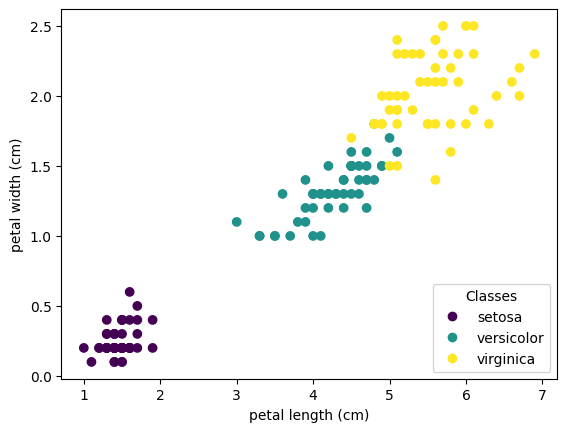

In [100]:
_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 2], iris.data[:, 3], c=iris.target)
ax.set(xlabel=iris.feature_names[2], ylabel=iris.feature_names[3])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

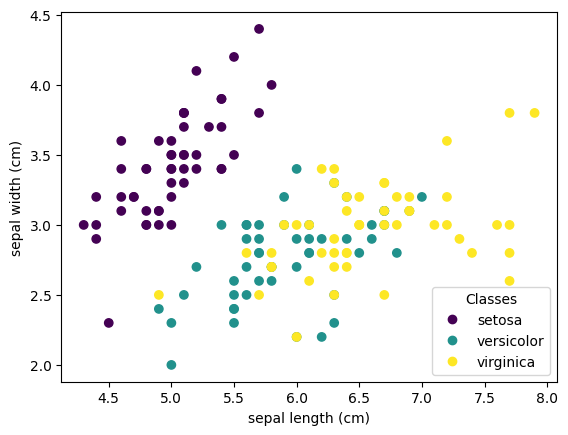

In [101]:
_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

In [116]:
X_pca = PCA(n_components=3).fit_transform(iris.data)
# X_pca = PCA(n_components=2).fit_transform(iris.data)

# X_pca = pd.DataFrame(X_pca, columns=['Feature 1', 'Feature 2', 'Feature 3'])
# X_pca

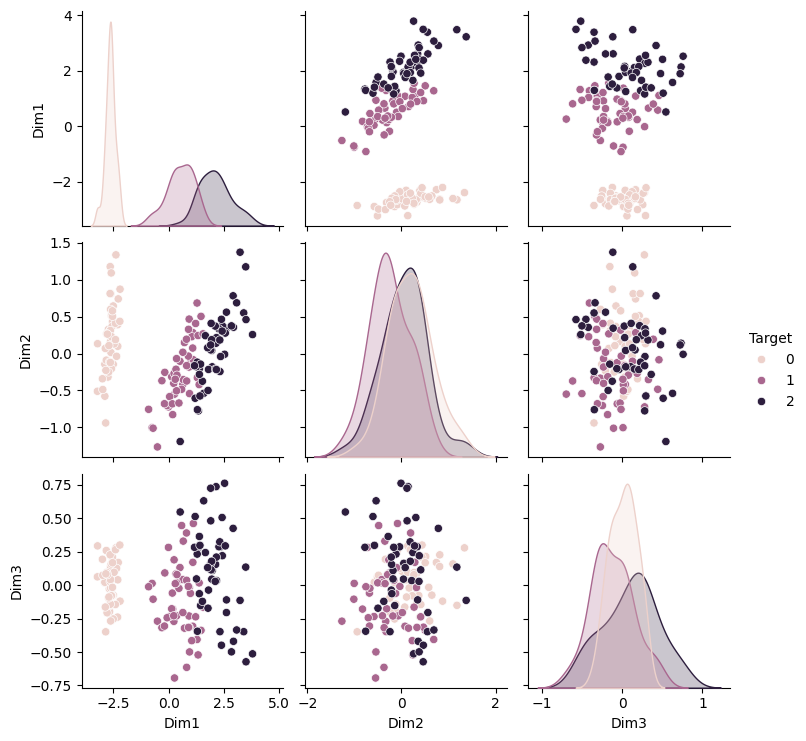

In [117]:
ppdf = pd.DataFrame(X_pca, columns=['Dim1', 'Dim2', 'Dim3'])
ppdf['Target'] = iris.target

sns.pairplot(ppdf, hue='Target')
plt.show()

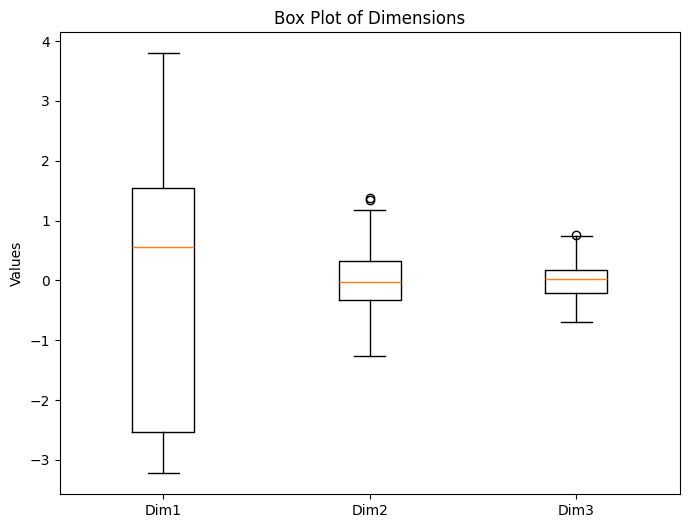

In [118]:
plt.figure(figsize=(8, 6))
plt.boxplot(X_pca, labels=['Dim1', 'Dim2', 'Dim3'])
plt.ylabel('Values')
plt.title('Box Plot of Dimensions')
plt.show()

In [115]:
X_pca.keys()

Index(['Feature 1', 'Feature 2', 'Feature 3'], dtype='object')

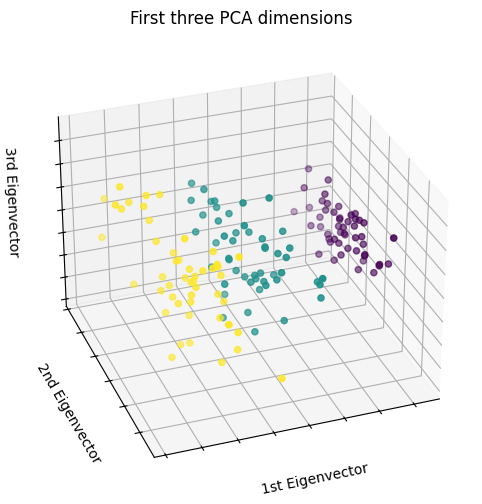

In [119]:
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

ax.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    X_pca[:, 2],
    c=iris.target,
    s=20,
)

ax.set_title("First three PCA dimensions")
ax.set_xlabel("1st Eigenvector")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd Eigenvector")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("3rd Eigenvector")
ax.zaxis.set_ticklabels([])

plt.show()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),KMCluster,OCluster,sepal area (cm^2),petal area (cm^2)
0,5.1,3.5,1.4,0.2,2,0,17.85,0.28
1,4.9,3.0,1.4,0.2,2,2,14.70,0.28
2,4.7,3.2,1.3,0.2,2,2,15.04,0.26
3,4.6,3.1,1.5,0.2,2,2,14.26,0.30
4,5.0,3.6,1.4,0.2,2,0,18.00,0.28


## Clustering

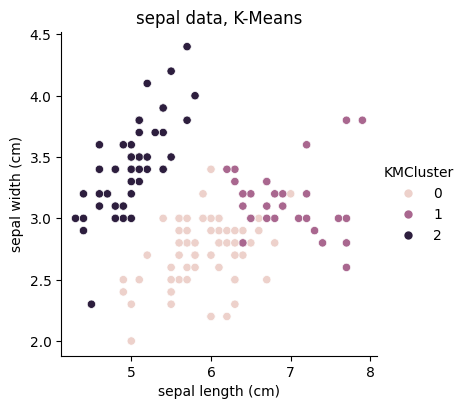

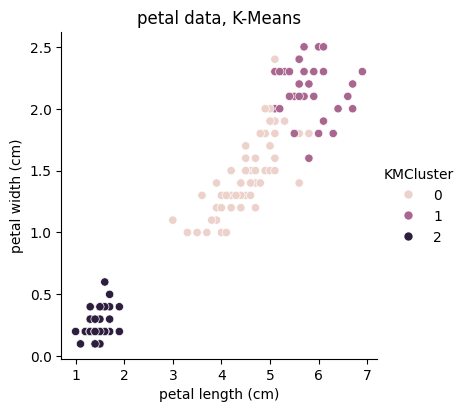

In [109]:
# K-Means

kmeans = cluster.KMeans(n_clusters = 3, n_init = 10)

X["KMCluster"] = kmeans.fit_predict(X)

a = sns.relplot(
    x="sepal length (cm)", y="sepal width (cm)", hue="KMCluster", data=X, height=4,
)
a.set(title='sepal data, K-Means')
b = sns.relplot(
    x="petal length (cm)", y="petal width (cm)", hue="KMCluster", data=X, height=4,
)
b.set(title='petal data, K-Means')




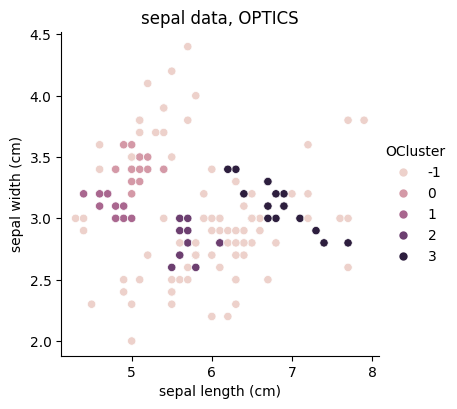

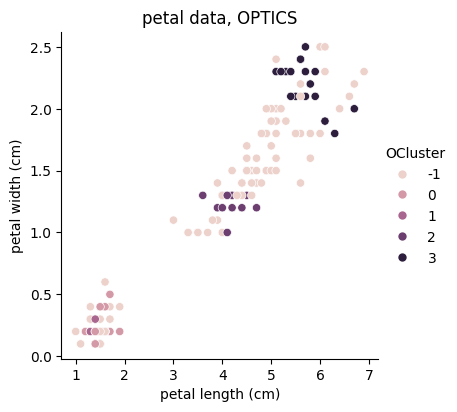

In [108]:
# OPTICS
optics = cluster.OPTICS(min_samples = 4, xi=0.05, min_cluster_size=0.05)
X["OCluster"] = optics.fit_predict(X)
c = sns.relplot(
    x="sepal length (cm)", y="sepal width (cm)", hue="OCluster", data=X, height=4,
)
c.set(title='sepal data, OPTICS')
d = sns.relplot(
    x="petal length (cm)", y="petal width (cm)", hue="OCluster", data=X, height=4,
)
d.set(title='petal data, OPTICS')


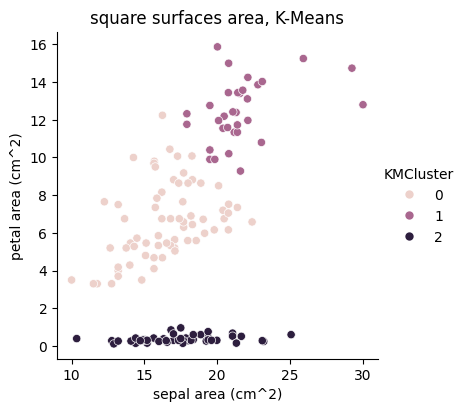

In [110]:
# Custom fake PCAs
X['sepal area (cm^2)'] = X['sepal length (cm)'] * X['sepal width (cm)']
X['petal area (cm^2)'] = X['petal length (cm)'] * X['petal width (cm)']

e = sns.relplot(
    x="sepal area (cm^2)", y="petal area (cm^2)", hue="KMCluster", data=X, height=4,
)
e.set(title='square surfaces area, K-Means')

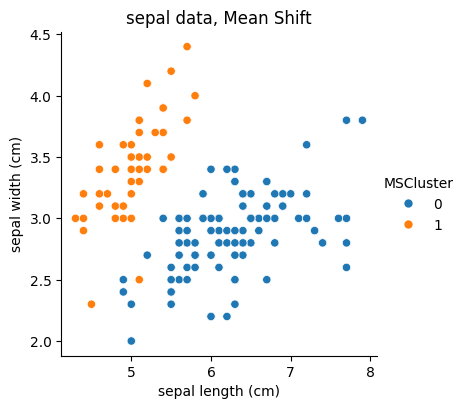

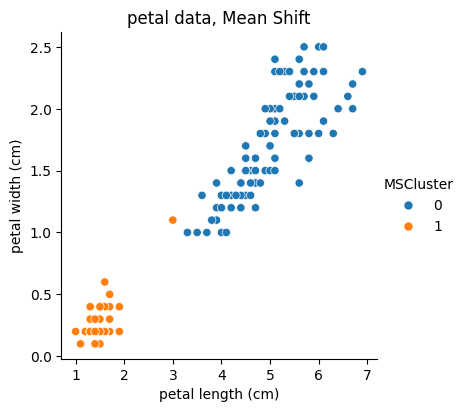

In [ ]:
# Mean Shift (can't specify # of clusters?)

bandwidth = cluster.estimate_bandwidth(X)
meanshift = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
X["MSCluster"] = meanshift.fit_predict(X)

labels = meanshift.labels_
cluster_centers = meanshift.cluster_centers_
cluster_centers
g = sns.relplot(
    x="sepal length (cm)", y="sepal width (cm)", hue="MSCluster", data=X, height=4,
)
g.set(title='sepal data, Mean Shift')
h = sns.relplot(
    x="petal length (cm)", y="petal width (cm)", hue="MSCluster", data=X, height=4,
)
h.set(title='petal data, Mean Shift')